### What Colors Pass the ExGI Filter?
This notebook renders a typical color picker background, with a fixed lightness value (see initial_L below), and keeps only the colors that pass the ExGI filter.

In [15]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import colorsys
import numpy as np

In [16]:
initial_L = 0.5  # the lightness of the color picker background
initial_exgi_threshold = 20  # colors with exgi greater than this value are kept, otherwise they are replaced with white pixels.

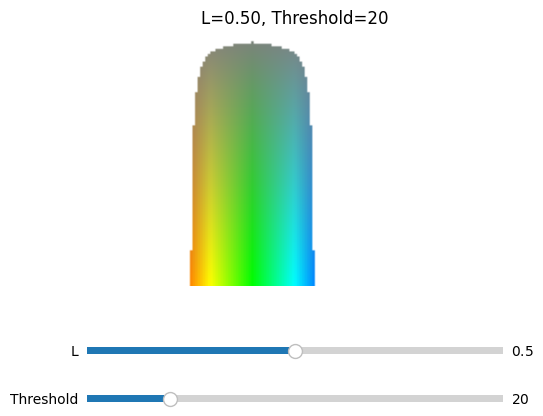

In [17]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.35)

hue = np.linspace(0, 1, 100)
saturation = np.linspace(0, 1, 100)
H, S = np.meshgrid(hue, saturation)


def update(val):
    L = l_slider.val
    threshold = threshold_slider.val
    image_rgb = np.zeros((100, 100, 3))

    for i in range(100):
        for j in range(100):
            r, g, b = colorsys.hls_to_rgb(H[i, j], L, S[i, j])
            image_rgb[i, j] = [r, g, b]

    mask = 2 * image_rgb[:, :, 1] - image_rgb[:, :, 0] - image_rgb[:, :, 2] <= threshold / 255.0
    image_rgb_filtered = np.copy(image_rgb)
    image_rgb_filtered[mask] = [1, 1, 1]  # Set removed colors to white

    ax.clear()
    ax.imshow(image_rgb_filtered)
    ax.set_title(f"L={L:.2f}, Threshold={threshold}")
    ax.axis('off')
    fig.canvas.draw_idle()


# Create sliders
axcolor = 'lightgoldenrodyellow'
ax_l = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
ax_threshold = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

l_slider = Slider(ax_l, 'L', 0, 1, valinit=initial_L, valstep=0.01)
threshold_slider = Slider(ax_threshold, 'Threshold', 0, 100, valinit=initial_exgi_threshold, valstep=1)

# Set the update function for sliders
l_slider.on_changed(update)
threshold_slider.on_changed(update)

update(None)

plt.show()
